### Import Library

In [368]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import joblib

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

### Load Data

In [369]:
df = joblib.load('../data/processed/ori_new.pkl')

In [370]:
df

,temperature,humidity,tvoc,eco2,raw_h2,raw_ethanol,pressure,pm10,pm25,nc05,nc10,nc25,fire_alarm
0,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0
1,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,0
2,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,0
3,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,0
4,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,0
62626,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,0
62627,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,0
62628,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,0


### Data Splitting

In [371]:
target = 'fire_alarm'
x = df.drop(target, axis=1).copy()
y = df[target].copy()

In [372]:
x

,temperature,humidity,tvoc,eco2,raw_h2,raw_ethanol,pressure,pm10,pm25,nc05,nc10,nc25
0,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000
1,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000
2,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000
3,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000
4,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...
62625,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015
62626,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015
62627,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014
62628,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014


In [373]:
y

0        0
1        0
2        0
3        0
4        0
        ..
62625    0
62626    0
62627    0
62628    0
62629    0
Name: fire_alarm, Length: 62630, dtype: int64

In [374]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42, stratify = y)
x_valid, x_test, y_valid, y_test = train_test_split(x_test, y_test, test_size = 0.5, random_state = 42, stratify = y_test)

In [375]:
joblib.dump(x_train, '../data/processed/x_train.pkl')
joblib.dump(y_train, '../data/processed/y_train.pkl')
joblib.dump(x_valid, '../data/processed/x_valid.pkl')
joblib.dump(y_valid, '../data/processed/y_valid.pkl')
joblib.dump(x_test, '../data/processed/x_test.pkl')
joblib.dump(y_test, '../data/processed/y_test.pkl')

['../data/processed/y_test.pkl']

In [376]:
# combine x dan y pada data train, agar lebih simple
train_set = pd.concat([x_train, y_train], axis = 1)

### Checking Null Value

In [377]:
train_set.isnull().sum().sort_values(ascending=True)

temperature    0
humidity       0
tvoc           0
eco2           0
raw_h2         0
raw_ethanol    0
pressure       0
pm10           0
pm25           0
nc05           0
nc10           0
nc25           0
fire_alarm     0
dtype: int64

### Data Exploration

In [378]:
train_set.head()

,temperature,humidity,tvoc,eco2,raw_h2,raw_ethanol,pressure,pm10,pm25,nc05,nc10,nc25,fire_alarm
43502,27.120,47.37,1228,405,12909,19428,938.728,1.66,1.73,11.46,1.787,0.040,1
16652,13.211,47.92,1264,424,12869,19410,938.763,2.24,2.33,15.44,2.408,0.054,1
53451,28.170,43.68,125,400,12793,20595,937.321,1.85,1.93,12.76,1.991,0.045,0
28269,20.540,58.07,202,400,13188,20014,939.689,2.25,2.34,15.48,2.414,0.055,1
11367,10.413,47.82,1073,629,12797,19449,939.098,2.07,2.15,14.27,2.226,0.050,1


In [379]:
train_set.describe().T

,count,mean,std,min,25%,50%,75%,max
temperature,43841.0,15.966466,14.321333,-22.010,11.060,20.160,25.430,59.930
humidity,43841.0,48.597769,8.790641,10.740,47.550,50.170,53.260,75.200
tvoc,43841.0,1913.721311,7740.415177,0.000,130.000,973.000,1187.000,60000.000
eco2,43841.0,670.036587,1919.770578,400.000,400.000,400.000,438.000,60000.000
raw_h2,43841.0,12942.081453,271.552695,10668.000,12830.000,12923.000,13108.000,13803.000
raw_ethanol,43841.0,19755.379371,607.683882,15317.000,19435.000,19503.000,20078.000,21410.000
pressure,43841.0,938.630784,1.328060,930.852,938.701,938.817,939.420,939.861
pm10,43841.0,102.290941,934.328679,0.000,1.290,1.810,2.090,14318.170
pm25,43841.0,189.017924,2007.342332,0.000,1.340,1.880,2.180,45432.260
nc05,43841.0,496.137272,4294.444422,0.000,8.870,12.440,14.420,61482.030


#### Check Correlation

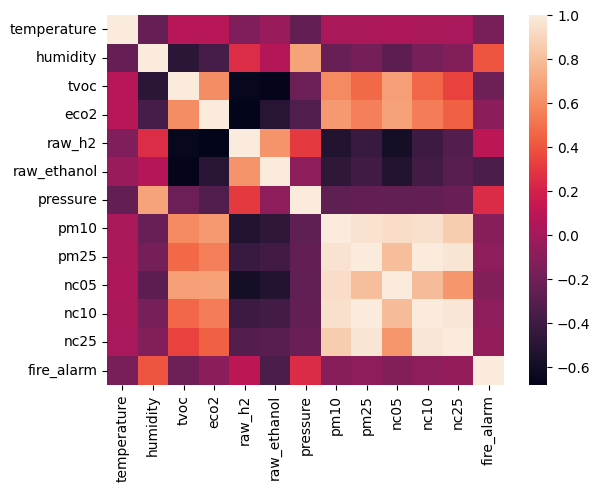

In [380]:
sns.heatmap(train_set.corr(numeric_only = True))
plt.show()

In [381]:
train_set.corr()

,temperature,humidity,tvoc,eco2,raw_h2,raw_ethanol,pressure,pm10,pm25,nc05,nc10,nc25,fire_alarm
temperature,1.000000,-0.238081,0.080934,0.078505,-0.140333,-0.035417,-0.249255,0.032693,0.026579,0.036309,0.026064,0.019740,-0.163384
humidity,-0.238081,1.000000,-0.485137,-0.370216,0.252846,0.066486,0.690161,-0.233247,-0.175432,-0.275708,-0.170806,-0.115710,0.397123
tvoc,0.080934,-0.485137,1.000000,0.601624,-0.652902,-0.672761,-0.217595,0.593089,0.474083,0.668171,0.464200,0.343804,-0.211046
eco2,0.078505,-0.370216,0.601624,1.000000,-0.679608,-0.501463,-0.327683,0.645757,0.552871,0.684418,0.544574,0.439299,-0.094535
raw_h2,-0.140333,0.252846,-0.652902,-0.679608,1.000000,0.628097,0.308569,-0.522954,-0.424456,-0.581601,-0.416174,-0.314542,0.106201
raw_ethanol,-0.035417,0.066486,-0.672761,-0.501463,0.628097,1.000000,-0.077239,-0.474496,-0.387926,-0.524418,-0.380599,-0.290356,-0.346068
pressure,-0.249255,0.690161,-0.217595,-0.327683,0.308569,-0.077239,1.000000,-0.267641,-0.252741,-0.255951,-0.250886,-0.223856,0.247576
pm10,0.032693,-0.233247,0.593089,0.645757,-0.522954,-0.474496,-0.267641,1.000000,0.957490,0.940865,0.951442,0.859710,-0.107519
pm25,0.026579,-0.175432,0.474083,0.552871,-0.424456,-0.387926,-0.252741,0.957490,1.000000,0.803143,0.999794,0.970507,-0.082193
nc05,0.036309,-0.275708,0.668171,0.684418,-0.581601,-0.524418,-0.255951,0.940865,0.803143,1.000000,0.790893,0.635828,-0.125538


### Outlier

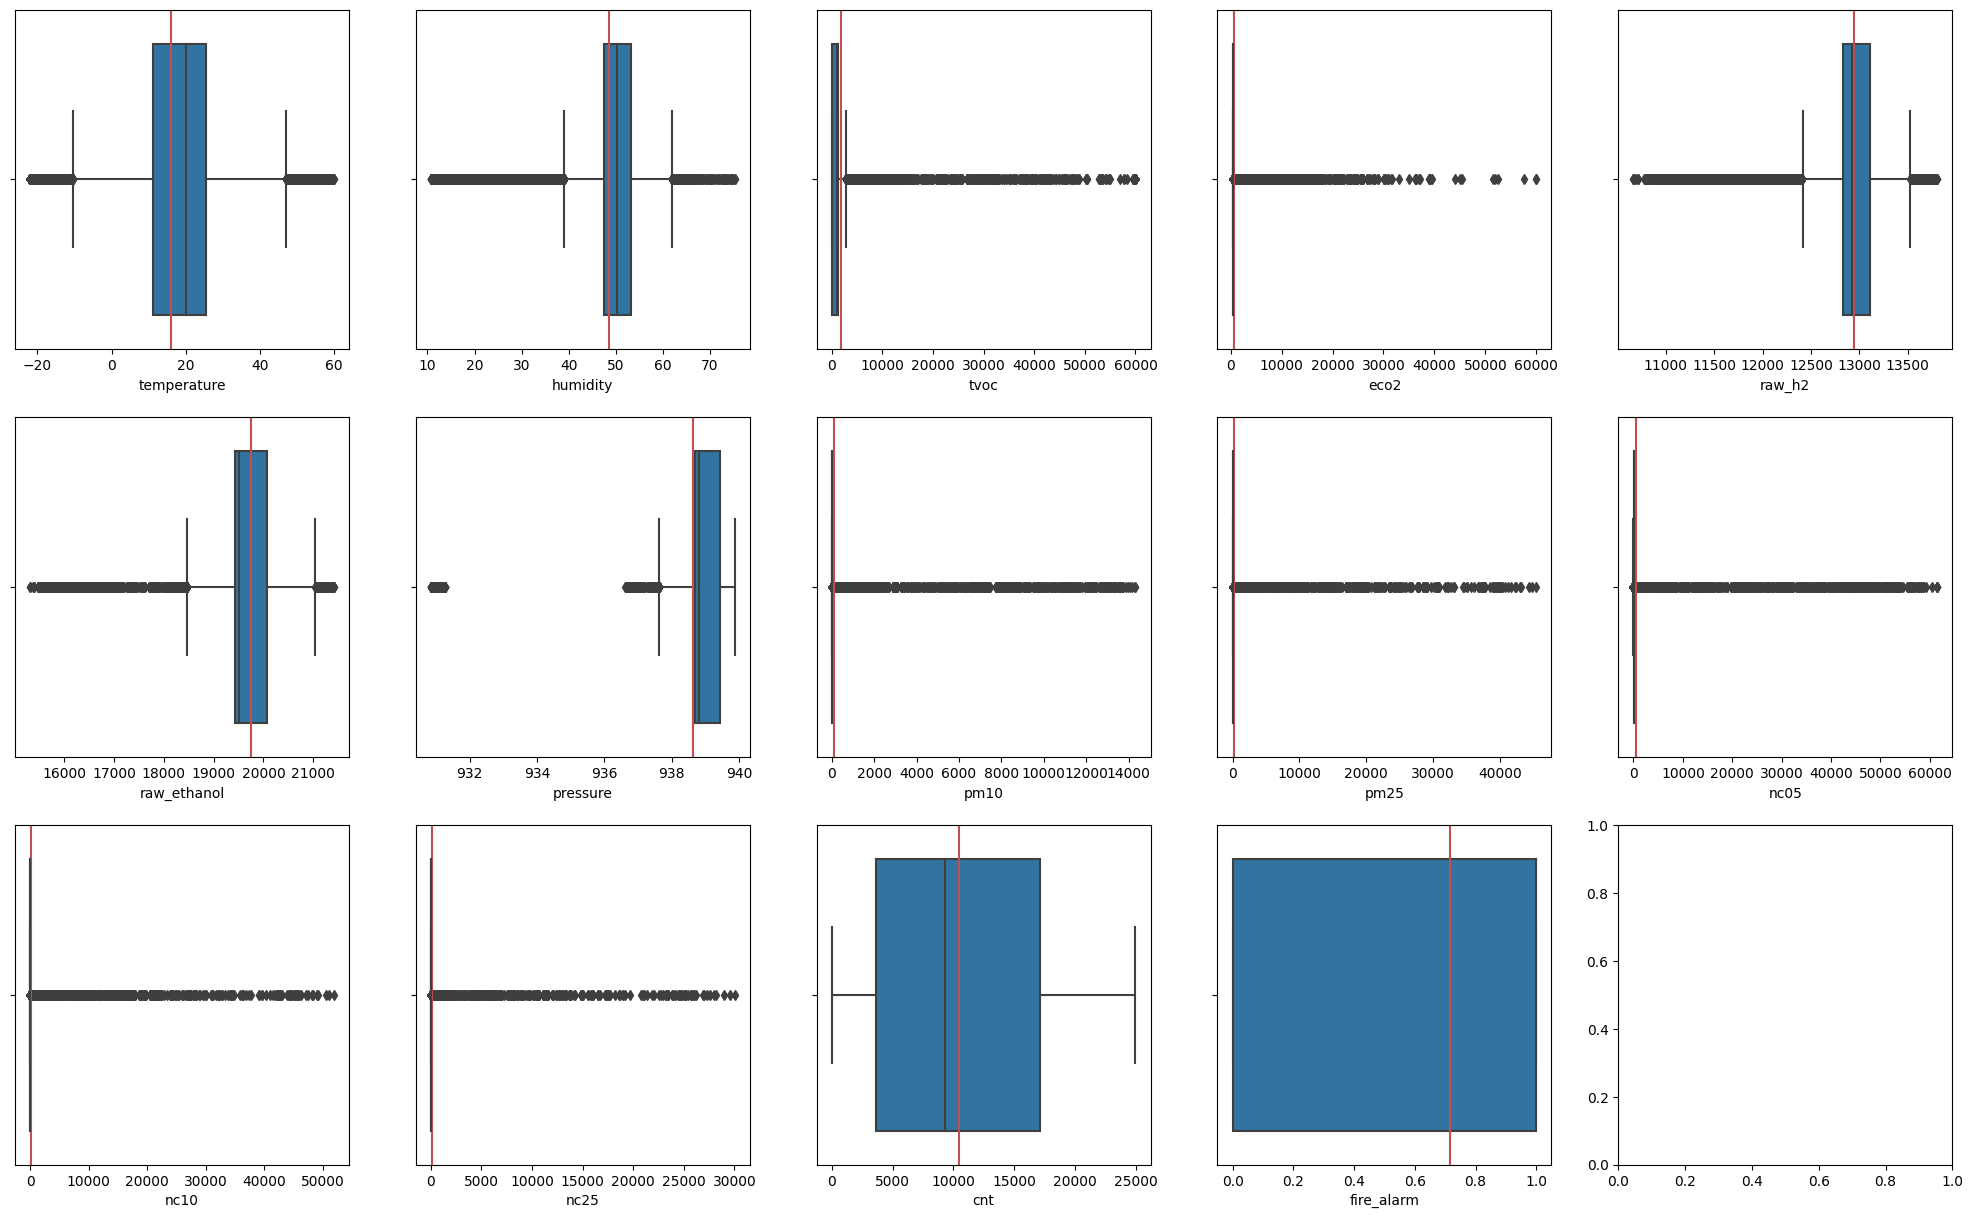

In [382]:
plt.style.use('default')

fig, ax = plt.subplots(nrows=3, ncols=5, figsize=(25,15))

for j,i in enumerate(z.columns):
    sns.boxplot(x=z[i], ax=ax[j//5,j%5])
    ax[j//5, j%5].axvline(z[i].mean(), 0, 1, color = 'r')
plt.show()

> dari boxplot, terlihat bahwa banyak outlier.

In [383]:
train_set.columns

Index(['temperature', 'humidity', 'tvoc', 'eco2', 'raw_h2', 'raw_ethanol',
       'pressure', 'pm10', 'pm25', 'nc05', 'nc10', 'nc25', 'fire_alarm'],
      dtype='object')

In [384]:
train_set_clean=pd.DataFrame()
for i in train_set.columns:
    q1 = train_set[i].quantile(0.25)
    q3 = train_set[i].quantile(0.75)
    iqr = q3-q1
    a = q1-(1.5*iqr)
    b = q3+(1.5*iqr)
    r = train_set[(train_set[i]>=a) & (train_set[i]<=b)]
    train_set_clean = pd.concat([train_set_clean,r])
duplicated_index = train_set_clean.index.value_counts()
used_index = duplicated_index[duplicated_index==13].index
train_set_clean = train_set_clean.loc[used_index].drop_duplicates()
train_set_clean

,temperature,humidity,tvoc,eco2,raw_h2,raw_ethanol,pressure,pm10,pm25,nc05,nc10,nc25,fire_alarm
43502,27.120,47.37,1228,405,12909,19428,938.728,1.66,1.73,11.46,1.787,0.040,1
26133,15.890,54.62,0,400,13074,19971,939.747,0.32,0.33,2.20,0.343,0.008,0
5137,-8.792,51.42,50,400,13232,20165,939.684,2.18,2.26,15.00,2.340,0.053,1
33067,18.600,54.98,316,400,13107,19948,939.387,0.36,0.37,2.48,0.387,0.009,1
3790,1.903,48.94,156,400,13214,20069,939.655,1.61,1.68,11.11,1.732,0.039,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5671,-9.190,49.29,61,400,13236,20190,939.738,2.37,2.46,16.31,2.543,0.057,1
19541,19.709,52.50,1260,406,12917,19417,938.688,1.64,1.70,11.29,1.761,0.040,1
5579,-9.258,55.54,39,400,13244,20212,939.732,2.57,2.67,17.71,2.761,0.062,1
31715,20.470,54.91,193,400,13158,20074,939.593,0.66,0.68,4.53,0.707,0.016,1


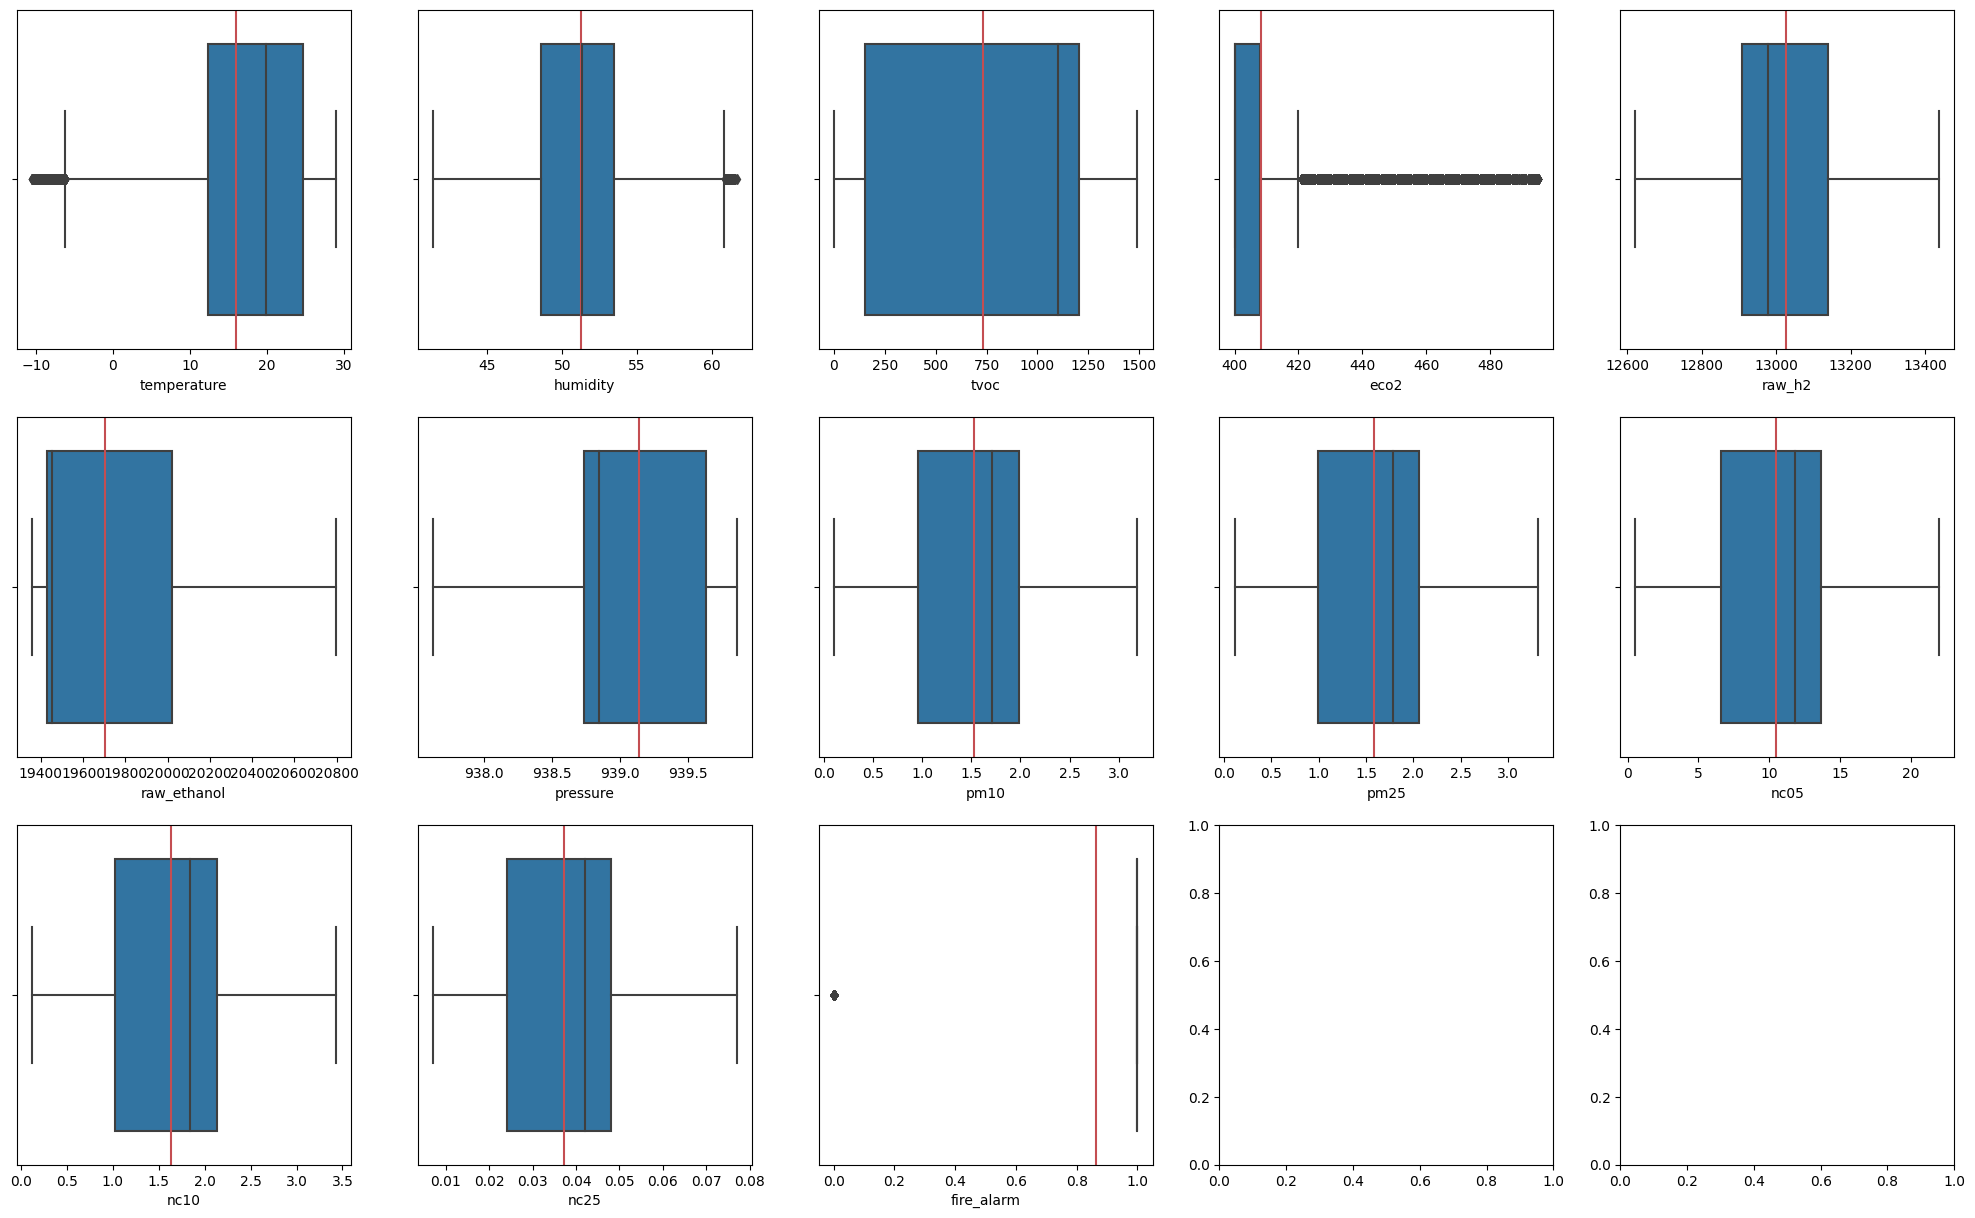

In [385]:
fig, ax = plt.subplots(nrows=3, ncols=5, figsize=(25,15))

for j,i in enumerate(train_set_clean.columns):
    sns.boxplot(x=train_set_clean[i], ax=ax[j//5,j%5])
    ax[j//5, j%5].axvline(train_set_clean[i].mean(), 0, 1, color = 'r')
plt.show()

#### Checking Imbalance & Treatment SMOTE

In [386]:
train_set[target].value_counts(normalize=True)

1    0.714628
0    0.285372
Name: fire_alarm, dtype: float64

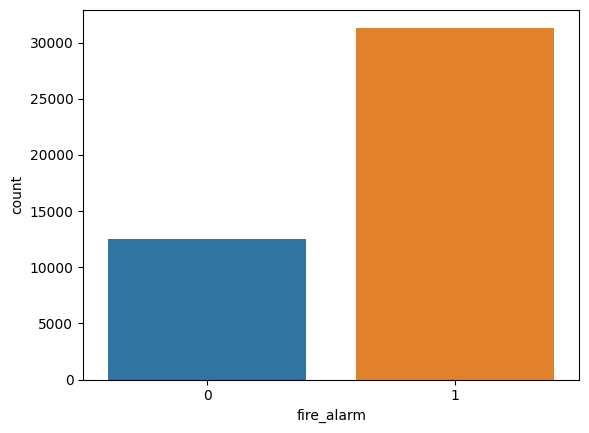

In [387]:
sns.countplot(data=train_set, x=target)
plt.show()

In [388]:
train_set_clean[target].value_counts(normalize=True)

1    0.86432
0    0.13568
Name: fire_alarm, dtype: float64

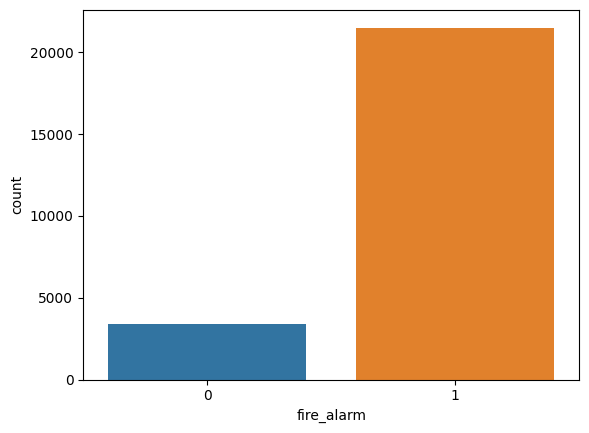

In [389]:
sns.countplot(data=train_set_clean, x=target)
plt.show()

> data target terlihat imbalance --> lakukan treatment imbalance data SMOTE

>Random oversampling just increases the size of the training data set through repetition of the original examples. It does not cause any >increase in the variety of training examples.

>Oversampling using SMOTE not only increases the size of the training data set, it also increases the variety.

>SMOTE creates new (artificial) training examples based on the original training examples. For instance, if it sees two examples (of the same >class) near each other, it creates a third artificial one, bang in the middle of the original two.

In [390]:
sm = SMOTE(random_state = 112)
x_sm, y_sm = sm.fit_resample(train_set_clean.drop(target, axis = 1), train_set_clean[target])
train_set_clean_sm = pd.concat([x_sm, y_sm], axis = 1)

In [391]:
train_set_clean_sm[target].value_counts()

1    21506
0    21506
Name: fire_alarm, dtype: int64

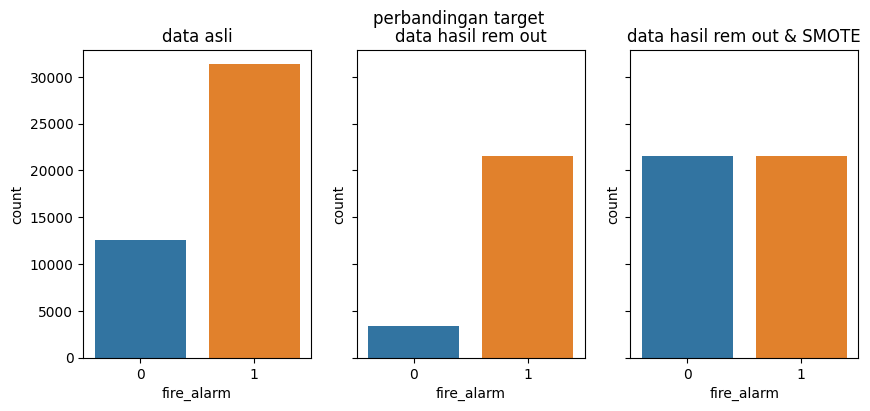

In [392]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10,4), sharey=True)
fig.suptitle('perbandingan target')
ax[0].set_title('data asli')
ax[1].set_title('data hasil rem out')
ax[2].set_title('data hasil rem out & SMOTE')

sns.countplot(data=train_set, x=target, ax=ax[0])
sns.countplot(data=train_set_clean, x=target, ax=ax[1])
sns.countplot(data=train_set_clean_sm, x=target, ax=ax[2])
plt.show()

In [393]:
train_set_clean_sm[target].value_counts()

1    21506
0    21506
Name: fire_alarm, dtype: int64

### Distribution

In [394]:
train_set_clean_sm.columns

Index(['temperature', 'humidity', 'tvoc', 'eco2', 'raw_h2', 'raw_ethanol',
       'pressure', 'pm10', 'pm25', 'nc05', 'nc10', 'nc25', 'fire_alarm'],
      dtype='object')

#### temperature

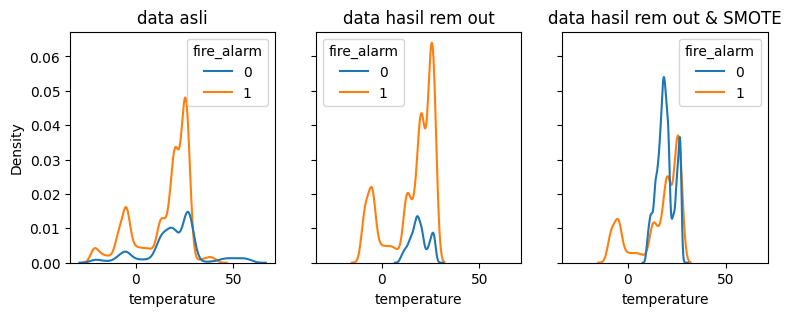

In [395]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(9,3), sharey=True, sharex=True)
ax[0].set_title('data asli')
ax[1].set_title('data hasil rem out')
ax[2].set_title('data hasil rem out & SMOTE')

sns.kdeplot(data=train_set, x='temperature', hue='fire_alarm', ax=ax[0])
sns.kdeplot(data=train_set_clean, x='temperature', hue='fire_alarm', ax=ax[1])
sns.kdeplot(data=train_set_clean_sm, x='temperature', hue='fire_alarm', ax=ax[2])
plt.show()

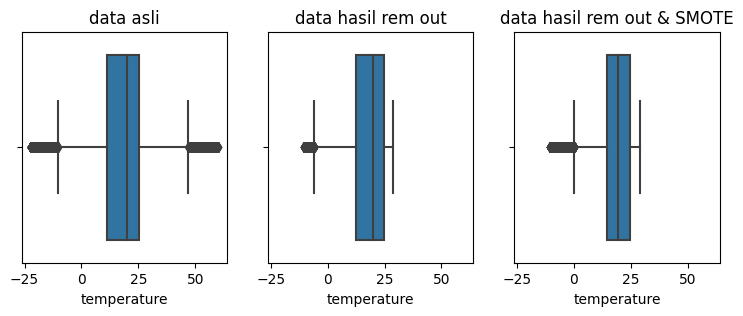

In [396]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(9,3), sharey=True, sharex=True)
ax[0].set_title('data asli')
ax[1].set_title('data hasil rem out')
ax[2].set_title('data hasil rem out & SMOTE')

sns.boxplot(data=train_set, x='temperature', ax=ax[0])
sns.boxplot(data=train_set_clean, x='temperature', ax=ax[1])
sns.boxplot(data=train_set_clean_sm, x='temperature', ax=ax[2])
plt.show()

#### humidity

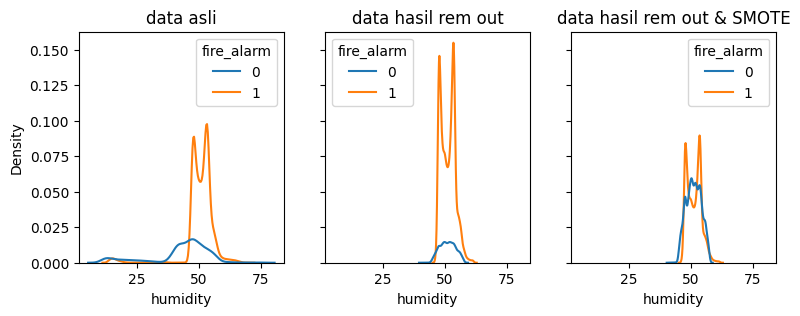

In [397]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(9,3), sharey=True, sharex=True)
ax[0].set_title('data asli')
ax[1].set_title('data hasil rem out')
ax[2].set_title('data hasil rem out & SMOTE')

sns.kdeplot(data=train_set, x='humidity', hue='fire_alarm', ax=ax[0])
sns.kdeplot(data=train_set_clean, x='humidity', hue='fire_alarm', ax=ax[1])
sns.kdeplot(data=train_set_clean_sm, x='humidity', hue='fire_alarm', ax=ax[2])
plt.show()

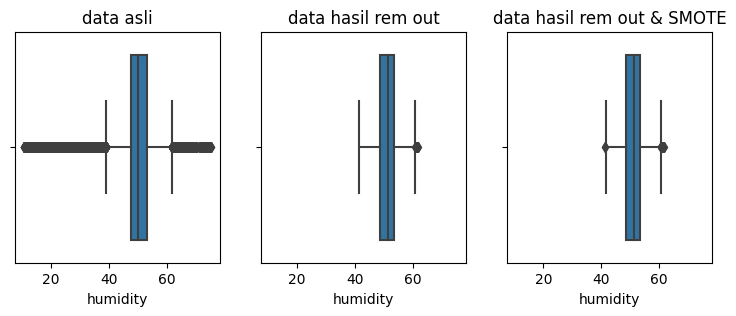

In [398]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(9,3), sharey=True, sharex=True)
ax[0].set_title('data asli')
ax[1].set_title('data hasil rem out')
ax[2].set_title('data hasil rem out & SMOTE')

sns.boxplot(data=train_set, x='humidity', ax=ax[0])
sns.boxplot(data=train_set_clean, x='humidity', ax=ax[1])
sns.boxplot(data=train_set_clean_sm, x='humidity', ax=ax[2])
plt.show()

#### tvoc

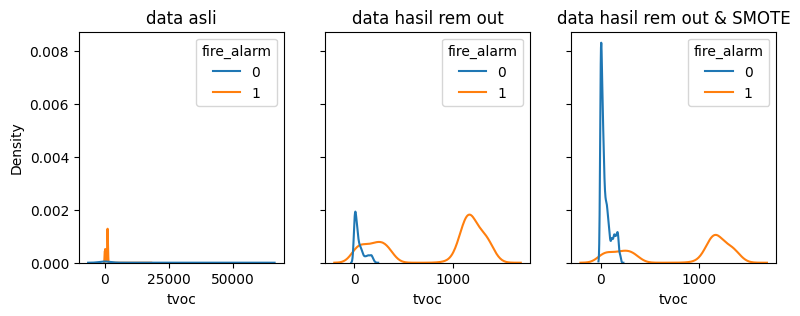

In [399]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(9,3), sharey=True)
ax[0].set_title('data asli')
ax[1].set_title('data hasil rem out')
ax[2].set_title('data hasil rem out & SMOTE')

sns.kdeplot(data=train_set, x='tvoc', hue='fire_alarm', ax=ax[0])
sns.kdeplot(data=train_set_clean, x='tvoc', hue='fire_alarm', ax=ax[1])
sns.kdeplot(data=train_set_clean_sm, x='tvoc', hue='fire_alarm', ax=ax[2])
plt.show()

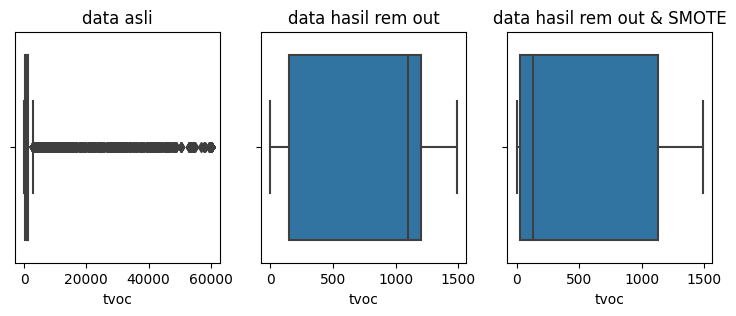

In [400]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(9,3), sharey=True)
ax[0].set_title('data asli')
ax[1].set_title('data hasil rem out')
ax[2].set_title('data hasil rem out & SMOTE')

sns.boxplot(data=train_set, x='tvoc', ax=ax[0])
sns.boxplot(data=train_set_clean, x='tvoc', ax=ax[1])
sns.boxplot(data=train_set_clean_sm, x='tvoc', ax=ax[2])
plt.show()

#### eco2

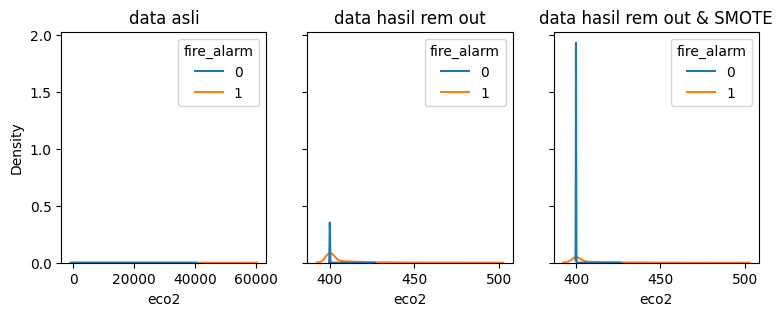

In [401]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(9,3), sharey=True)
ax[0].set_title('data asli')
ax[1].set_title('data hasil rem out')
ax[2].set_title('data hasil rem out & SMOTE')

sns.kdeplot(data=train_set, x='eco2', hue='fire_alarm', ax=ax[0])
sns.kdeplot(data=train_set_clean, x='eco2', hue='fire_alarm', ax=ax[1])
sns.kdeplot(data=train_set_clean_sm, x='eco2', hue='fire_alarm', ax=ax[2])
plt.show()

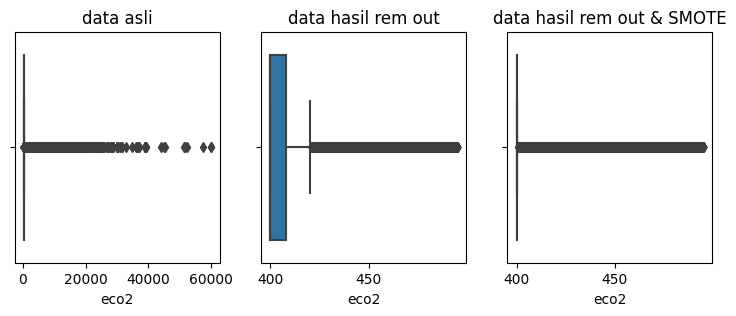

In [402]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(9,3), sharey=True)
ax[0].set_title('data asli')
ax[1].set_title('data hasil rem out')
ax[2].set_title('data hasil rem out & SMOTE')

sns.boxplot(data=train_set, x='eco2', ax=ax[0])
sns.boxplot(data=train_set_clean, x='eco2', ax=ax[1])
sns.boxplot(data=train_set_clean_sm, x='eco2', ax=ax[2])
plt.show()

#### raw_h2

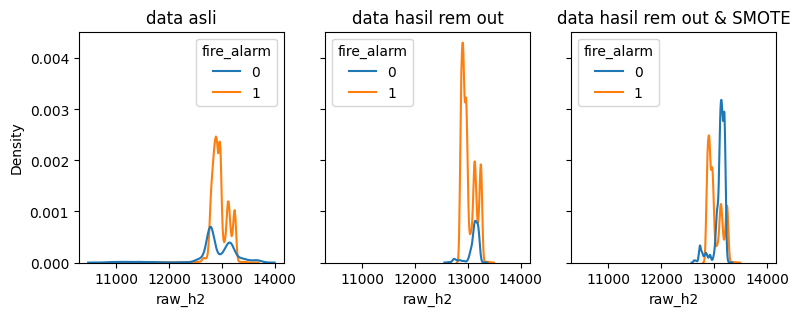

In [403]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(9,3), sharey=True, sharex=True)
ax[0].set_title('data asli')
ax[1].set_title('data hasil rem out')
ax[2].set_title('data hasil rem out & SMOTE')

sns.kdeplot(data=train_set, x='raw_h2', hue='fire_alarm', ax=ax[0])
sns.kdeplot(data=train_set_clean, x='raw_h2', hue='fire_alarm', ax=ax[1])
sns.kdeplot(data=train_set_clean_sm, x='raw_h2', hue='fire_alarm', ax=ax[2])
plt.show()

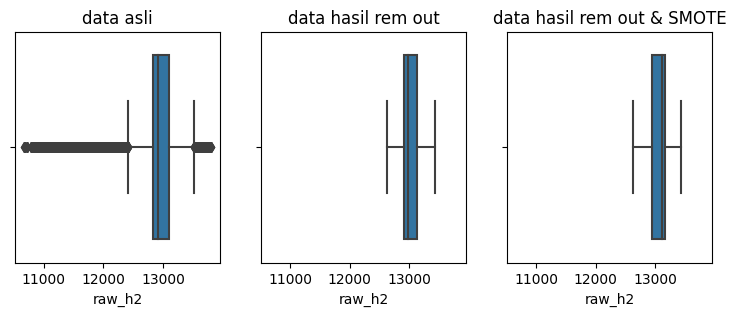

In [404]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(9,3), sharey=True, sharex=True)
ax[0].set_title('data asli')
ax[1].set_title('data hasil rem out')
ax[2].set_title('data hasil rem out & SMOTE')

sns.boxplot(data=train_set, x='raw_h2', ax=ax[0])
sns.boxplot(data=train_set_clean, x='raw_h2', ax=ax[1])
sns.boxplot(data=train_set_clean_sm, x='raw_h2', ax=ax[2])
plt.show()

#### raw_ethanol

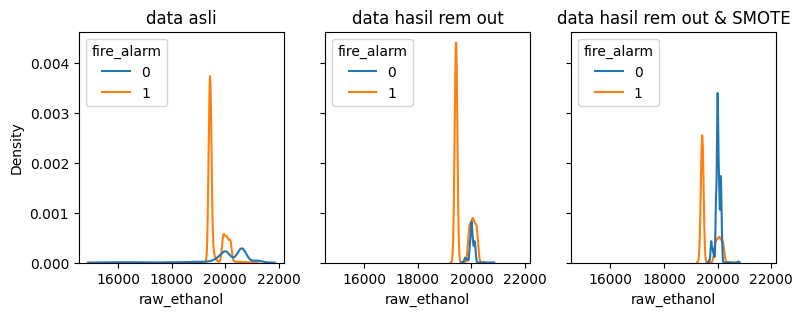

In [405]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(9,3), sharey=True, sharex=True)
ax[0].set_title('data asli')
ax[1].set_title('data hasil rem out')
ax[2].set_title('data hasil rem out & SMOTE')

sns.kdeplot(data=train_set, x='raw_ethanol', hue='fire_alarm', ax=ax[0])
sns.kdeplot(data=train_set_clean, x='raw_ethanol', hue='fire_alarm', ax=ax[1])
sns.kdeplot(data=train_set_clean_sm, x='raw_ethanol', hue='fire_alarm', ax=ax[2])
plt.show()

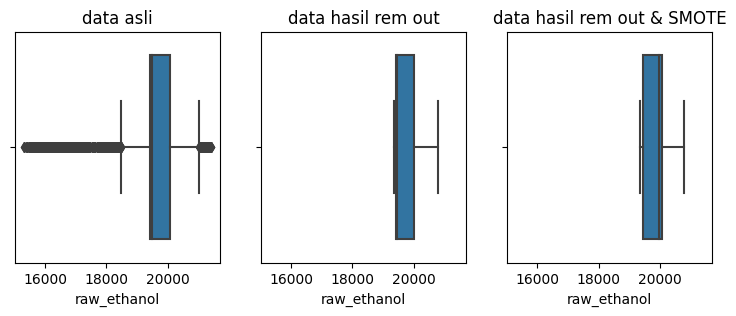

In [406]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(9,3), sharey=True, sharex=True)
ax[0].set_title('data asli')
ax[1].set_title('data hasil rem out')
ax[2].set_title('data hasil rem out & SMOTE')

sns.boxplot(data=train_set, x='raw_ethanol', ax=ax[0])
sns.boxplot(data=train_set_clean, x='raw_ethanol', ax=ax[1])
sns.boxplot(data=train_set_clean_sm, x='raw_ethanol', ax=ax[2])
plt.show()

#### pressure

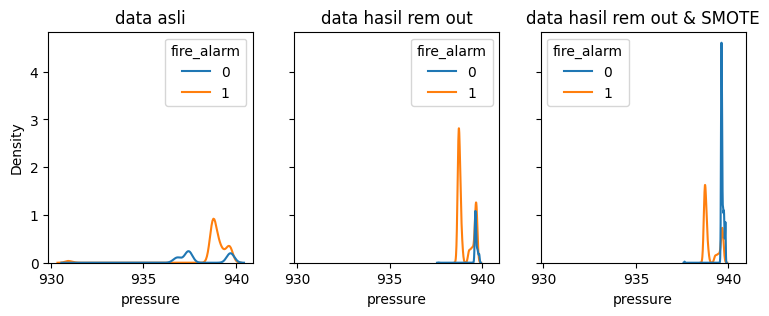

In [407]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(9,3), sharey=True, sharex=True)
ax[0].set_title('data asli')
ax[1].set_title('data hasil rem out')
ax[2].set_title('data hasil rem out & SMOTE')

sns.kdeplot(data=train_set, x='pressure', hue='fire_alarm', ax=ax[0])
sns.kdeplot(data=train_set_clean, x='pressure', hue='fire_alarm', ax=ax[1])
sns.kdeplot(data=train_set_clean_sm, x='pressure', hue='fire_alarm', ax=ax[2])
plt.show()

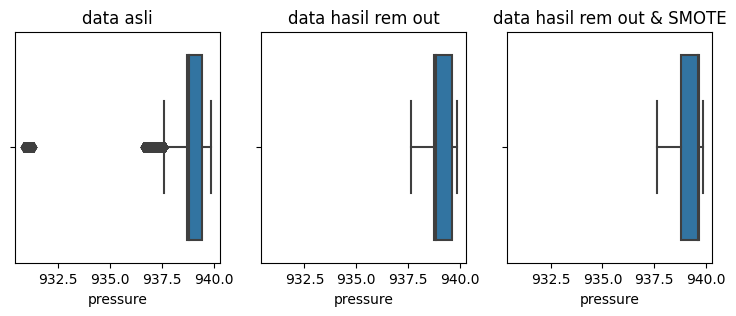

In [408]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(9,3), sharey=True, sharex=True)
ax[0].set_title('data asli')
ax[1].set_title('data hasil rem out')
ax[2].set_title('data hasil rem out & SMOTE')

sns.boxplot(data=train_set, x='pressure', ax=ax[0])
sns.boxplot(data=train_set_clean, x='pressure', ax=ax[1])
sns.boxplot(data=train_set_clean_sm, x='pressure', ax=ax[2])
plt.show()

#### pm10

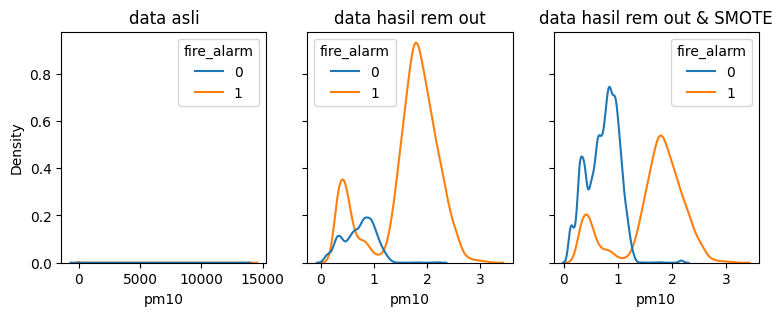

In [409]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(9,3), sharey=True)
ax[0].set_title('data asli')
ax[1].set_title('data hasil rem out')
ax[2].set_title('data hasil rem out & SMOTE')

sns.kdeplot(data=train_set, x='pm10', hue='fire_alarm', ax=ax[0])
sns.kdeplot(data=train_set_clean, x='pm10', hue='fire_alarm', ax=ax[1])
sns.kdeplot(data=train_set_clean_sm, x='pm10', hue='fire_alarm', ax=ax[2])
plt.show()

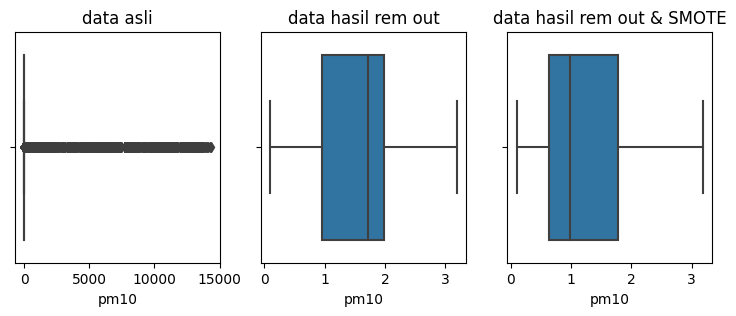

In [410]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(9,3), sharey=True)
ax[0].set_title('data asli')
ax[1].set_title('data hasil rem out')
ax[2].set_title('data hasil rem out & SMOTE')

sns.boxplot(data=train_set, x='pm10', ax=ax[0])
sns.boxplot(data=train_set_clean, x='pm10', ax=ax[1])
sns.boxplot(data=train_set_clean_sm, x='pm10', ax=ax[2])
plt.show()

#### pm25

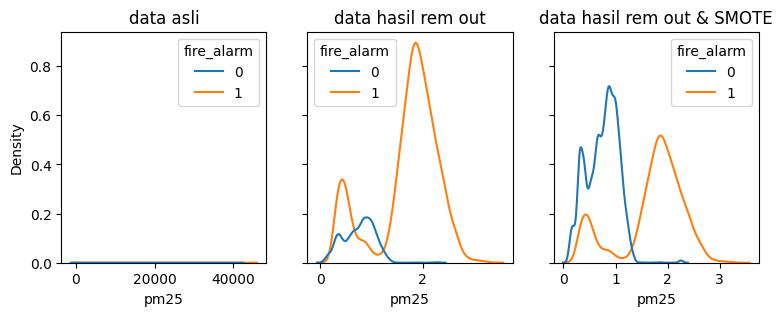

In [411]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(9,3), sharey=True)
ax[0].set_title('data asli')
ax[1].set_title('data hasil rem out')
ax[2].set_title('data hasil rem out & SMOTE')

sns.kdeplot(data=train_set, x='pm25', hue='fire_alarm', ax=ax[0])
sns.kdeplot(data=train_set_clean, x='pm25', hue='fire_alarm', ax=ax[1])
sns.kdeplot(data=train_set_clean_sm, x='pm25', hue='fire_alarm', ax=ax[2])
plt.show()

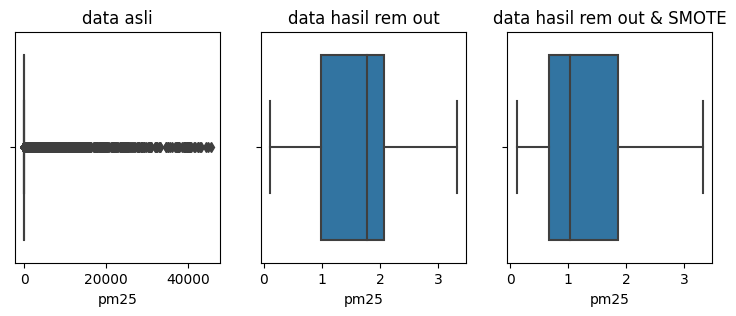

In [412]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(9,3), sharey=True)
ax[0].set_title('data asli')
ax[1].set_title('data hasil rem out')
ax[2].set_title('data hasil rem out & SMOTE')

sns.boxplot(data=train_set, x='pm25', ax=ax[0])
sns.boxplot(data=train_set_clean, x='pm25', ax=ax[1])
sns.boxplot(data=train_set_clean_sm, x='pm25', ax=ax[2])
plt.show()

#### nc05

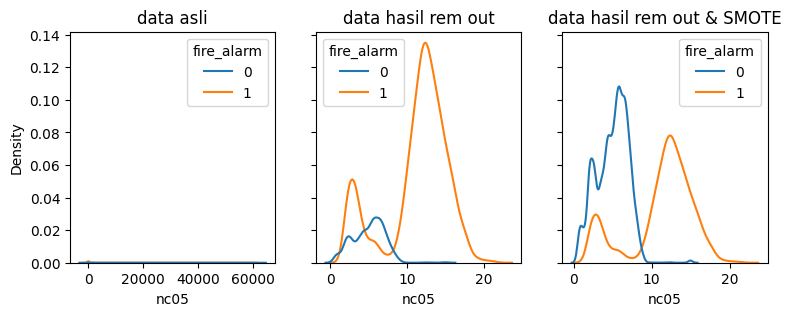

In [413]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(9,3), sharey=True)
ax[0].set_title('data asli')
ax[1].set_title('data hasil rem out')
ax[2].set_title('data hasil rem out & SMOTE')

sns.kdeplot(data=train_set, x='nc05', hue='fire_alarm', ax=ax[0])
sns.kdeplot(data=train_set_clean, x='nc05', hue='fire_alarm', ax=ax[1])
sns.kdeplot(data=train_set_clean_sm, x='nc05', hue='fire_alarm', ax=ax[2])
plt.show()

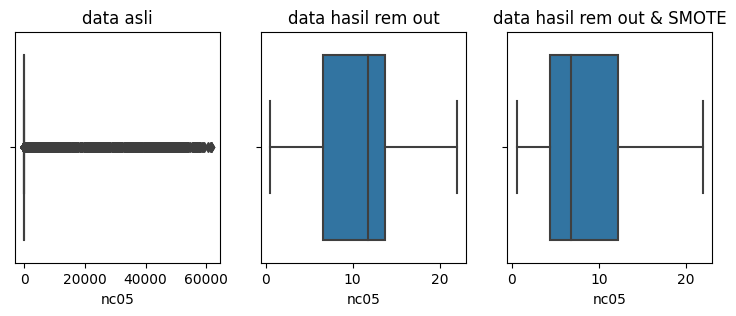

In [414]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(9,3), sharey=True)
ax[0].set_title('data asli')
ax[1].set_title('data hasil rem out')
ax[2].set_title('data hasil rem out & SMOTE')

sns.boxplot(data=train_set, x='nc05', ax=ax[0])
sns.boxplot(data=train_set_clean, x='nc05', ax=ax[1])
sns.boxplot(data=train_set_clean_sm, x='nc05', ax=ax[2])
plt.show()

#### nc10

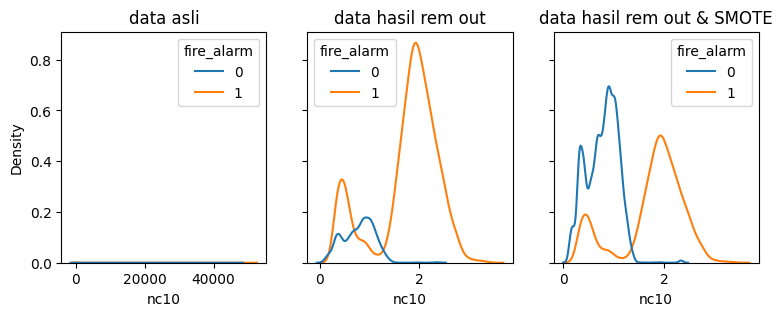

In [415]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(9,3), sharey=True)
ax[0].set_title('data asli')
ax[1].set_title('data hasil rem out')
ax[2].set_title('data hasil rem out & SMOTE')

sns.kdeplot(data=train_set, x='nc10', hue='fire_alarm', ax=ax[0])
sns.kdeplot(data=train_set_clean, x='nc10', hue='fire_alarm', ax=ax[1])
sns.kdeplot(data=train_set_clean_sm, x='nc10', hue='fire_alarm', ax=ax[2])
plt.show()

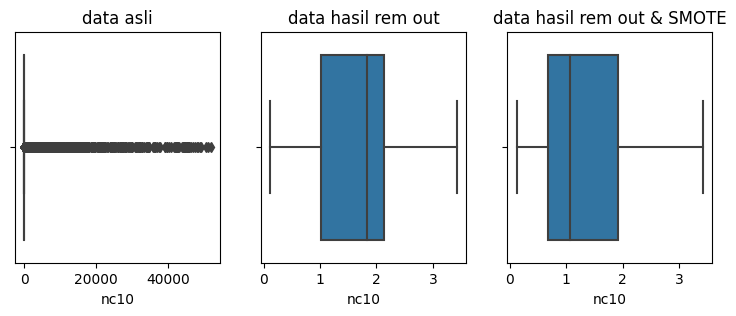

In [416]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(9,3), sharey=True)
ax[0].set_title('data asli')
ax[1].set_title('data hasil rem out')
ax[2].set_title('data hasil rem out & SMOTE')

sns.boxplot(data=train_set, x='nc10', ax=ax[0])
sns.boxplot(data=train_set_clean, x='nc10', ax=ax[1])
sns.boxplot(data=train_set_clean_sm, x='nc10', ax=ax[2])
plt.show()

#### nc25

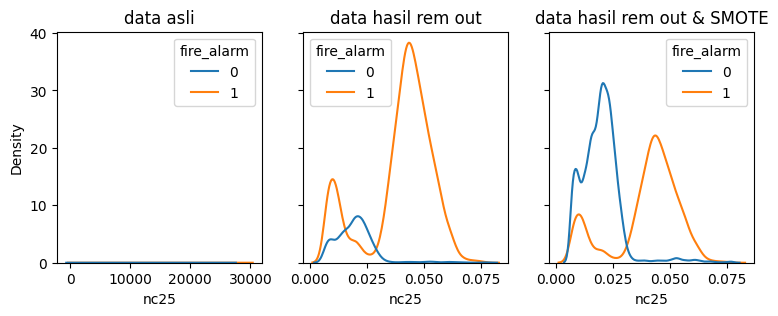

In [417]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(9,3), sharey=True)
ax[0].set_title('data asli')
ax[1].set_title('data hasil rem out')
ax[2].set_title('data hasil rem out & SMOTE')

sns.kdeplot(data=train_set, x='nc25', hue='fire_alarm', ax=ax[0])
sns.kdeplot(data=train_set_clean, x='nc25', hue='fire_alarm', ax=ax[1])
sns.kdeplot(data=train_set_clean_sm, x='nc25', hue='fire_alarm', ax=ax[2])
plt.show()

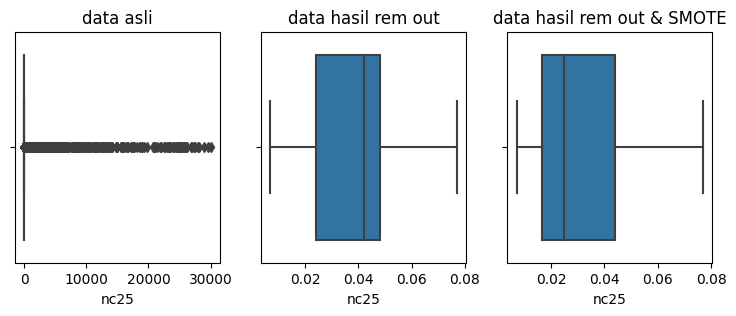

In [418]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(9,3), sharey=True)
ax[0].set_title('data asli')
ax[1].set_title('data hasil rem out')
ax[2].set_title('data hasil rem out & SMOTE')

sns.boxplot(data=train_set, x='nc25', ax=ax[0])
sns.boxplot(data=train_set_clean, x='nc25', ax=ax[1])
sns.boxplot(data=train_set_clean_sm, x='nc25', ax=ax[2])
plt.show()

### Correlation Spearman

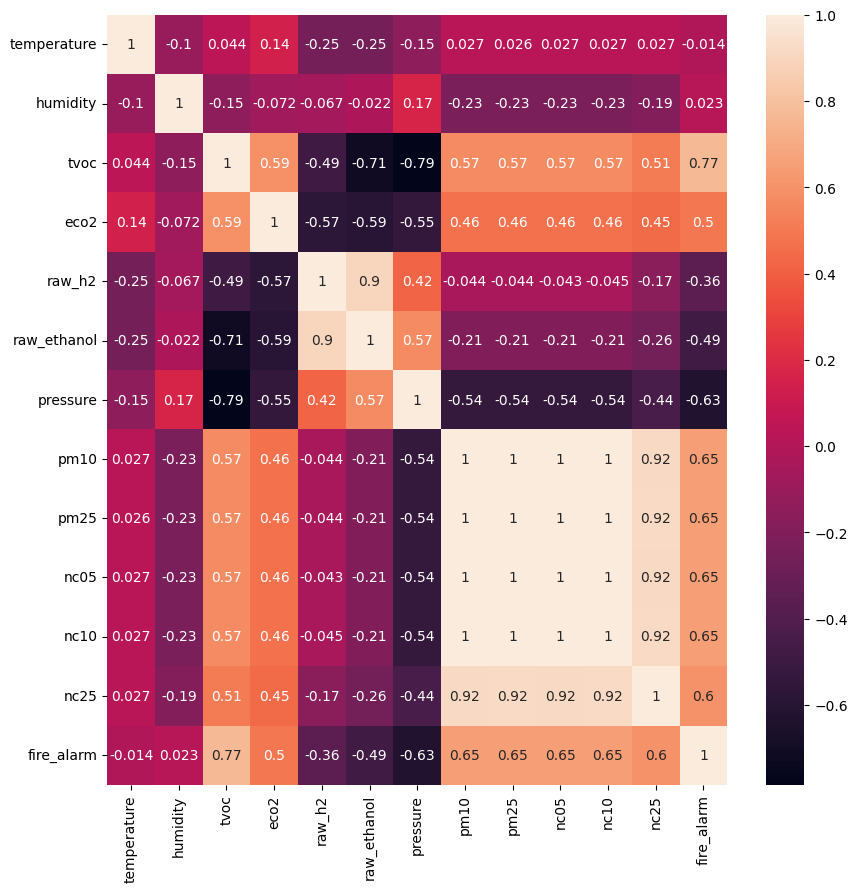

In [419]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(train_set_clean_sm.corr(method='spearman', numeric_only = True), annot=True, ax=ax)
plt.show()

> Karena pm10, pm25, nc05, nc10, dan nc25 mempunyai nilai corelation 0.95-1 yg artinya mempunyai korelasi hampir sempurna, sehingga bs di wakilkan oleh 1 predictor saja. maka akan di drop, di sisakan hanya 1 saja, misal pm10

In [420]:
def correlated(x):
    train_corr = train_set_clean_sm.corr()
    print(x.upper())
    print('------------')
    tmp = train_corr[(train_corr[x]>=0.5) | (train_corr[x]<=-0.5)][x]
    return tmp

a =  train_set_clean_sm.corr()
for col in a.columns:
    print(correlated(col))
    print()

TEMPERATURE
------------
temperature    1.0
Name: temperature, dtype: float64

HUMIDITY
------------
humidity    1.0
Name: humidity, dtype: float64

TVOC
------------
tvoc           1.000000
raw_h2        -0.679452
raw_ethanol   -0.950170
pressure      -0.972281
pm10           0.657671
pm25           0.657884
nc05           0.657565
nc10           0.657931
nc25           0.616376
fire_alarm     0.741555
Name: tvoc, dtype: float64

ECO2
------------
eco2    1.0
Name: eco2, dtype: float64

RAW_H2
------------
tvoc          -0.679452
raw_h2         1.000000
raw_ethanol    0.845133
pressure       0.639746
Name: raw_h2, dtype: float64

RAW_ETHANOL
------------
tvoc          -0.950170
raw_h2         0.845133
raw_ethanol    1.000000
pressure       0.901459
nc25          -0.519169
fire_alarm    -0.610427
Name: raw_ethanol, dtype: float64

PRESSURE
------------
tvoc          -0.972281
raw_h2         0.639746
raw_ethanol    0.901459
pressure       1.000000
pm10          -0.652086
pm25          -

#### Remove corr yang kuat

In [421]:
new_cols = ['temperature', 'humidity', 'tvoc', 'eco2', 'raw_h2', 'raw_ethanol', 'pressure', 'pm10', 'fire_alarm']
train_set_clean_sm = train_set_clean_sm[new_cols].copy()
train_set_clean_sm

,temperature,humidity,tvoc,eco2,raw_h2,raw_ethanol,pressure,pm10,fire_alarm
0,27.120000,47.370000,1228,405,12909,19428,938.728000,1.660000,1
1,15.890000,54.620000,0,400,13074,19971,939.747000,0.320000,0
2,-8.792000,51.420000,50,400,13232,20165,939.684000,2.180000,1
3,18.600000,54.980000,316,400,13107,19948,939.387000,0.360000,1
4,1.903000,48.940000,156,400,13214,20069,939.655000,1.610000,1
...,...,...,...,...,...,...,...,...,...
43007,18.126802,49.244925,11,400,13115,20014,939.661107,0.600640,0
43008,15.211347,51.899346,2,400,12996,19926,939.731163,0.288245,0
43009,26.569841,56.330484,0,400,13097,19998,939.720397,0.622540,0
43010,19.402662,52.310000,9,400,13216,20160,939.610000,1.170000,0


### Pairplot

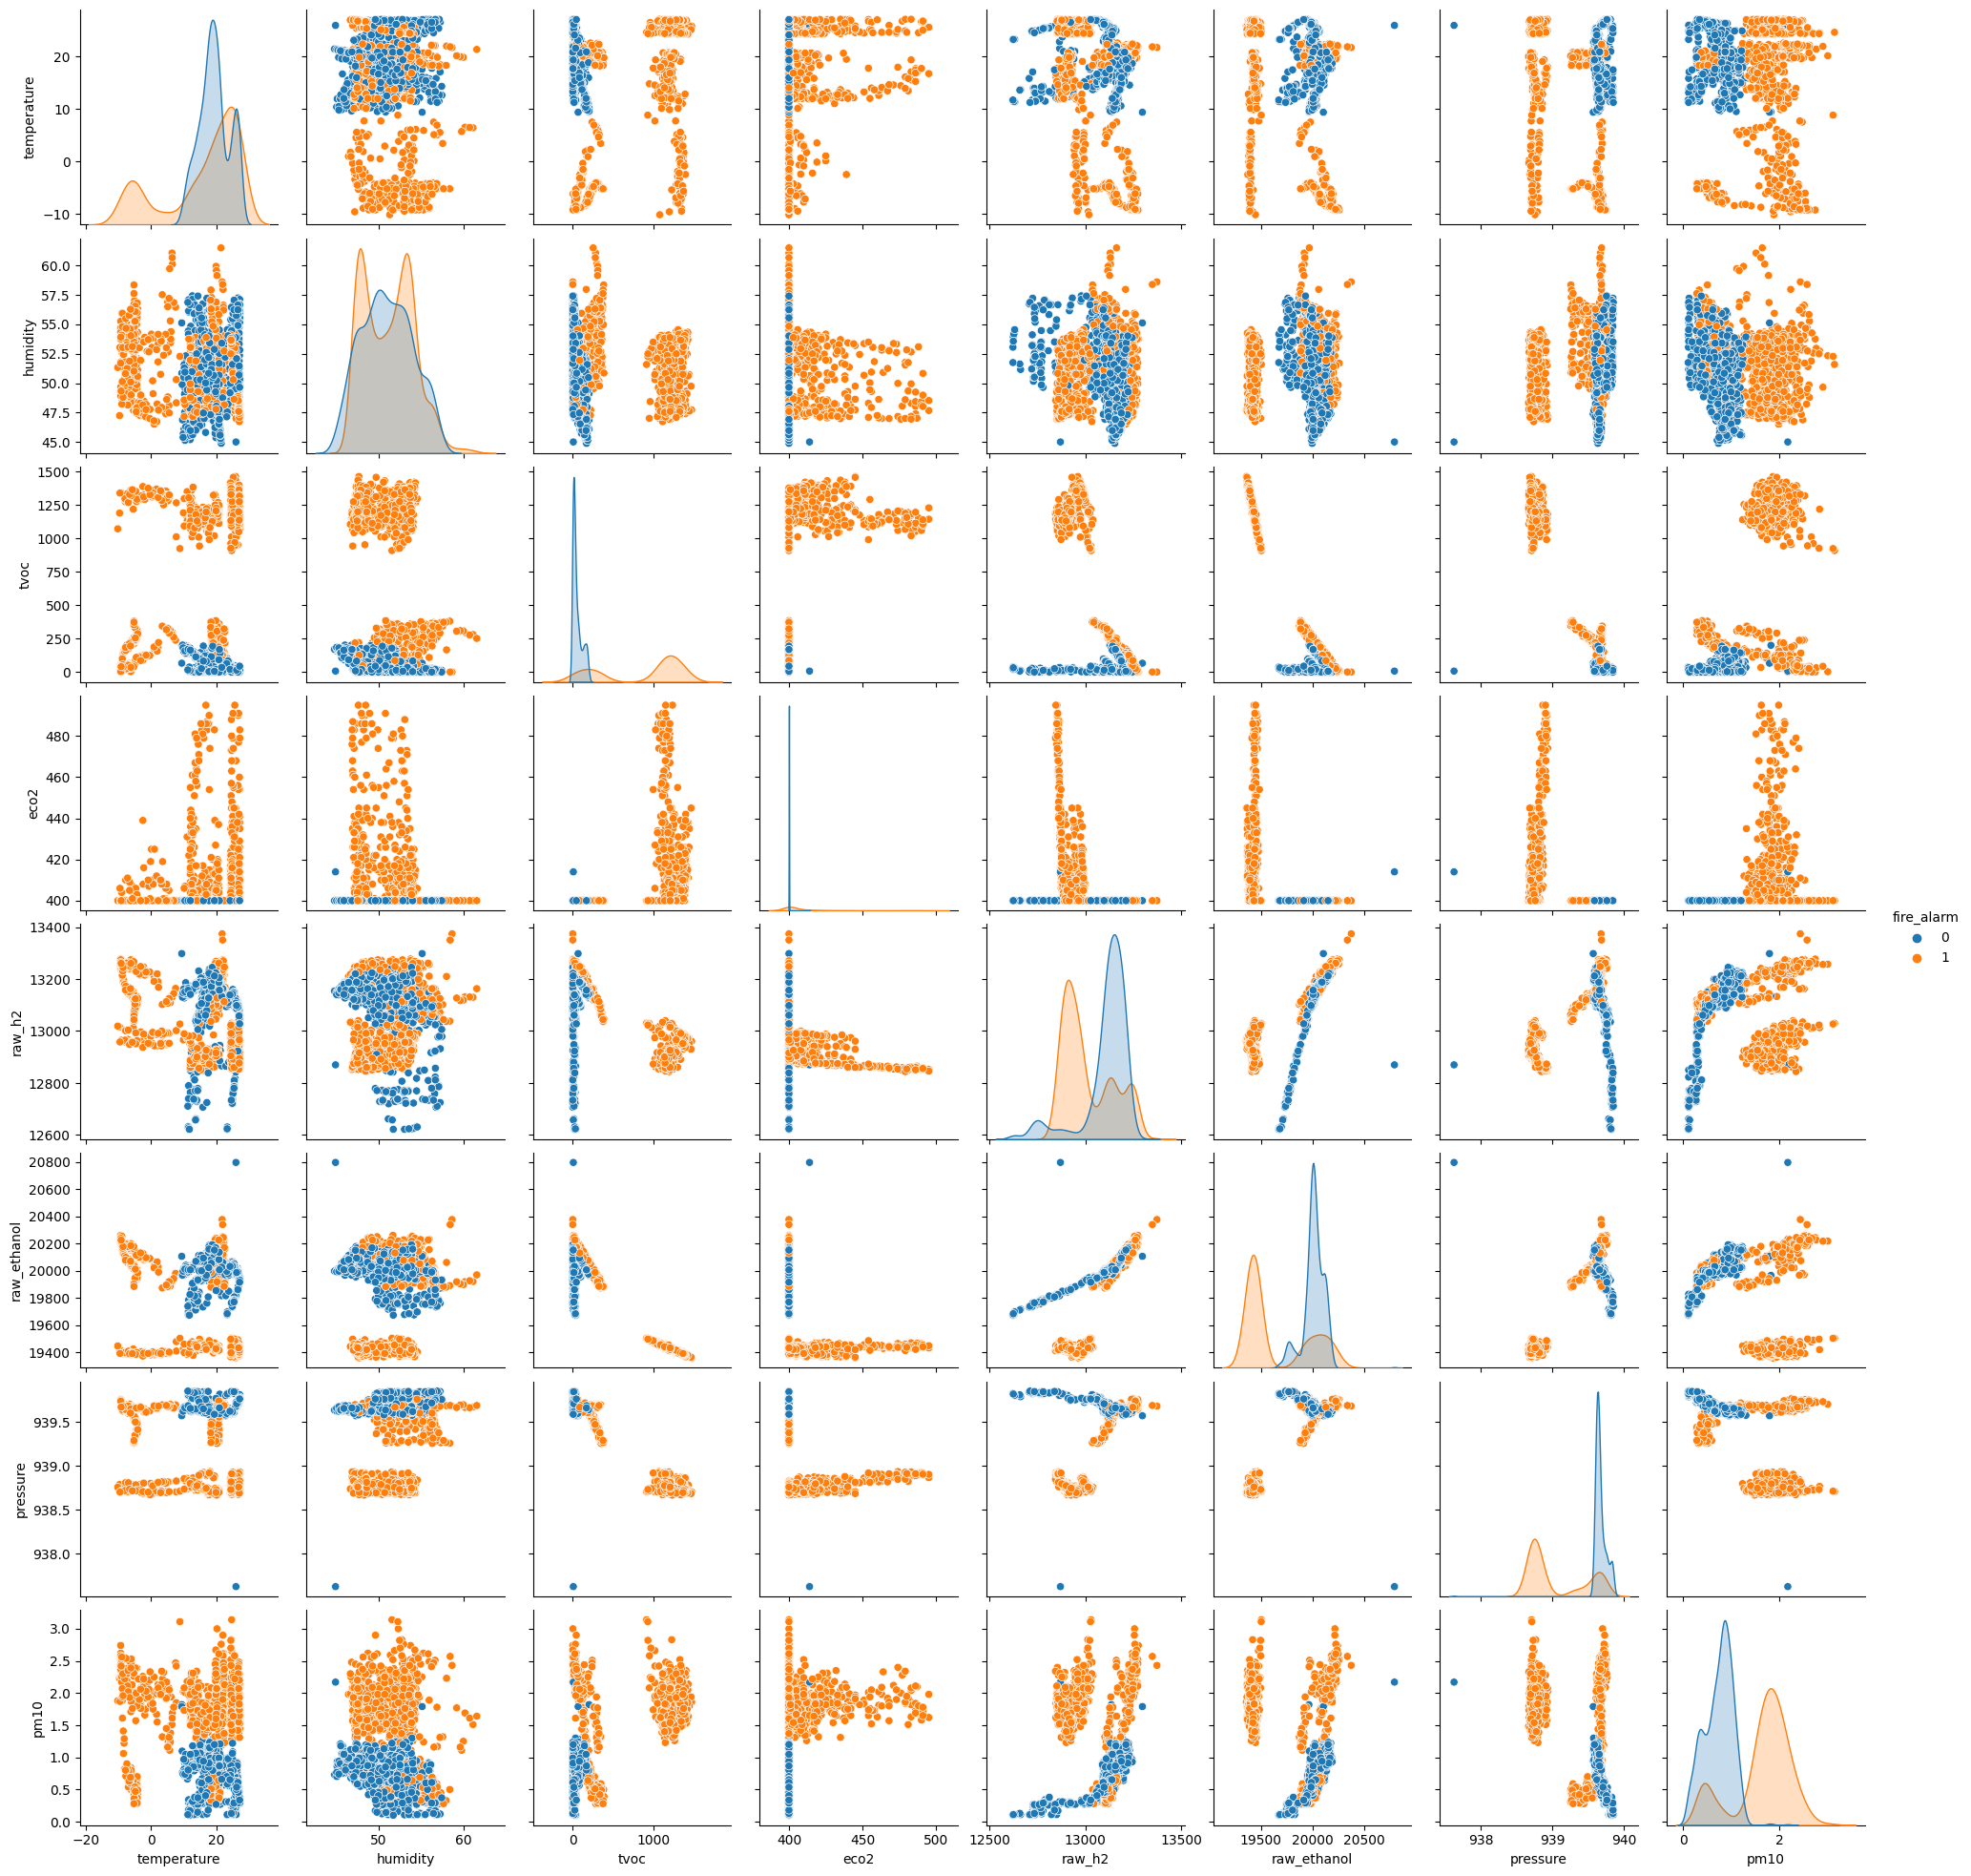

In [422]:
sns.pairplot(train_set_clean_sm.sample(2000), hue=target)
plt.show()

### Data Range -final

In [423]:
train_set_clean_sm.describe().T

,count,mean,std,min,25%,50%,75%,max
temperature,43012.0,17.412674,9.147209,-10.490,14.790560,19.328804,24.520,28.910
humidity,43012.0,51.180581,2.919829,41.350,48.670000,51.220000,53.430,61.650
tvoc,43012.0,445.891263,534.418130,0.000,25.000000,131.000000,1134.000,1490.000
eco2,43012.0,404.748582,14.219722,400.000,400.000000,400.000000,400.000,495.000
raw_h2,43012.0,13060.146773,132.202866,12622.000,12940.750000,13105.000000,13163.000,13438.000
raw_ethanol,43012.0,19833.352948,292.925289,19358.000,19446.000000,19976.000000,20053.000,20795.000
pressure,43012.0,939.359203,0.426407,937.624,938.804000,939.614544,939.662,939.856
pm10,43012.0,1.184725,0.659586,0.100,0.639722,0.992176,1.780,3.190
fire_alarm,43012.0,0.500000,0.500006,0.000,0.000000,0.500000,1.000,1.000


> data sebenarnya punya scale yg cukup lebar. --> nanti dapat di Standarisasi dg Standard Scaler  
> hanya saja, apabila model yg di pakai sangat sensitif dg jarak sperti knn, apabila seperti DecisionTree, tidak perlu dilakukan  
> nanti akan dilihat saat melakukan baseline model  

In [424]:
x_train = train_set_clean_sm.drop(target, axis=1)
y_train = train_set_clean_sm[target].copy()

In [425]:
joblib.dump(x_train, '../data/processed/x_train.pkl')
joblib.dump(y_train, '../data/processed/y_train.pkl')
joblib.dump(x_valid, '../data/processed/x_valid.pkl')
joblib.dump(y_valid, '../data/processed/y_valid.pkl')
joblib.dump(x_test, '../data/processed/x_test.pkl')
joblib.dump(y_test, '../data/processed/y_test.pkl')

['../data/processed/y_test.pkl']

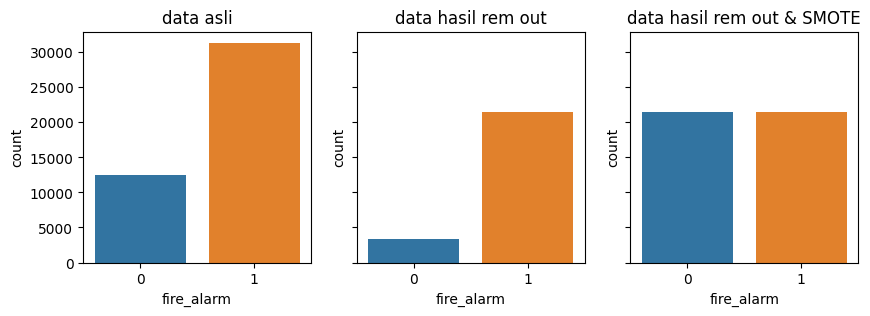

In [426]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10,3), sharey=True)
ax[0].set_title('data asli')
ax[1].set_title('data hasil rem out')
ax[2].set_title('data hasil rem out & SMOTE')

sns.countplot(data=train_set, x=target, ax=ax[0])
sns.countplot(data=train_set_clean, x=target, ax=ax[1])
sns.countplot(data=train_set_clean_sm, x=target, ax=ax[2])
plt.show()

In [427]:
print(train_set.shape)
print(train_set_clean.shape)
print(train_set_clean_sm.shape)

(43841, 13)
(24882, 13)
(43012, 9)


> Dari hasil EDA terlihat bahwa ada beberapa kolom yg korelasinya sangat kuat, sehingga bisa di wakilkan oleh 1 variable saja

> banyak data outlier, sehingga perlu di remove terlebih dahulu

> data target, imbalance, solusi di SMOTE

> Data ready utk proses modelling